<a href="https://colab.research.google.com/github/sitthatkaja/DPDM2023/blob/main/dpdm23_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Exam

Use data in [GDrive](https://drive.google.com/drive/folders/1XbCThEWAcYZOg8vl1diHEOW0GL1nLUzX?usp=sharing) to train find the best Data Mining - Machine Learning model that can predict the SalePrice correctly.

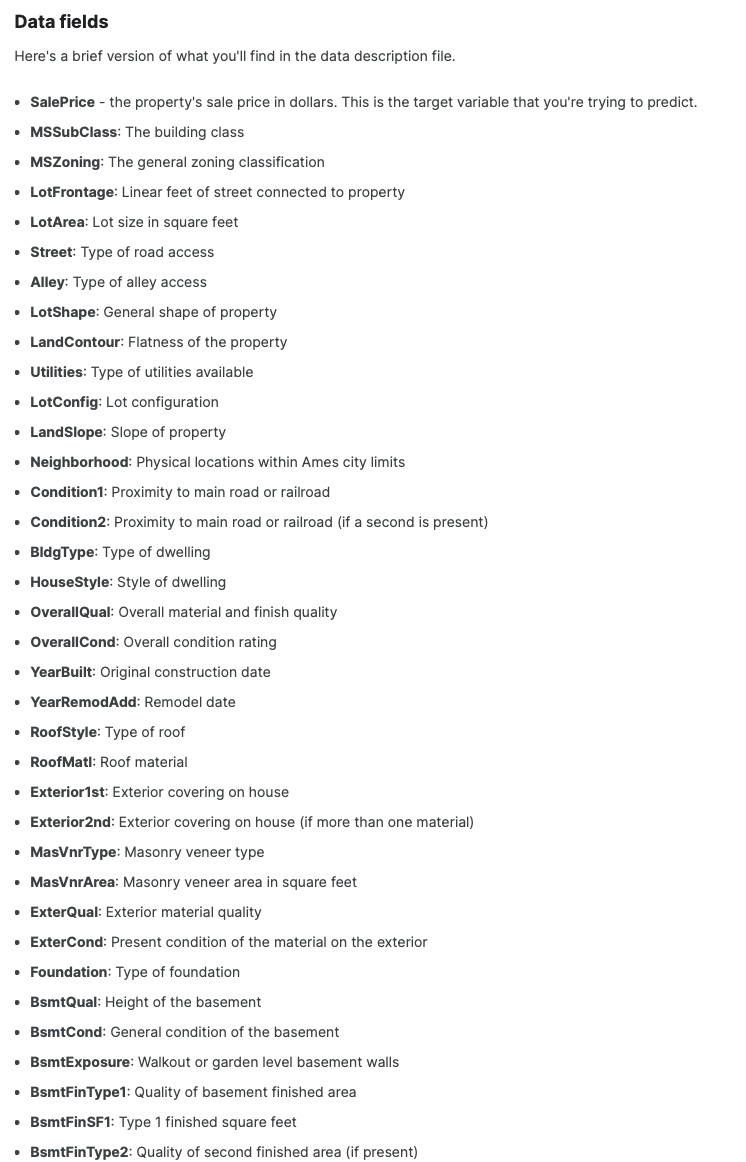

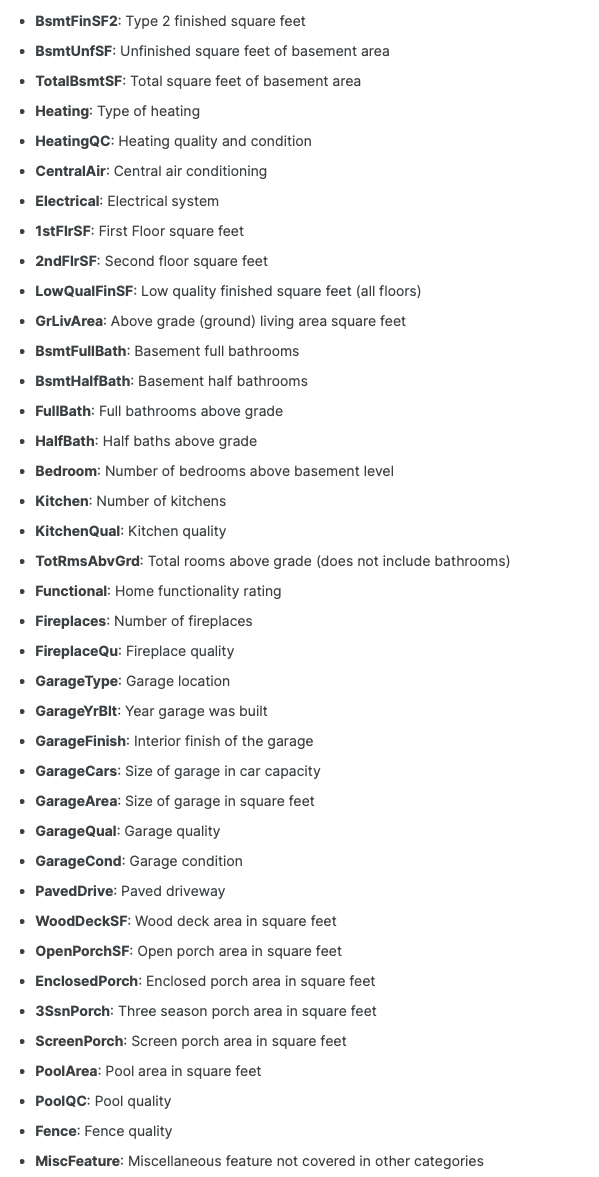

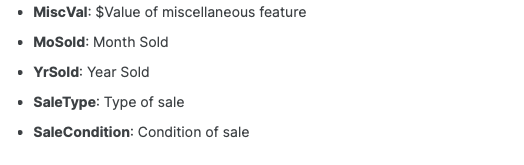

*Hint: Use Mean Average Percentage Error (MAPE) and Mean Square Error (MSE) as the evaluation metrics*

*Hint2: Try your best to show appropriate, unbias data mining-machine learning process to select the best model and to report the result*

*Hint3: The final score will be based on: Effort, Report, DM-ML Process, Model Performance*

## Data Preparation

ในการทำ Data Preparation จะเป็นการนำข้อมูลเข้ามาเพื่อนำมาสร้าง Model สำหรับการทำนายค่า SalePrice ประกอบด้วยขั้นตอนดังนี้
  - Import
  - Selecting Data
  - Data Preprocessing

### import

การนำข้อมูลเข้ามายัง colab โดยมีขั้นตอนดังนี้

In [1]:
# Import คำสั่งในการใช้งานได้แก่ pandas และ numpy
import pandas as pd
import numpy as np

In [2]:
# เรียกใช้งานจาก Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [379]:
#ทำการอ่านค่าตาราง CSV จากข้อมูลใน Google Drive ด้วยชื่อไฟล์ที่ต้องการเก็บไว้ใน data
data = pd.read_csv('/content/drive/MyDrive/DPDM23_DATA/FinalExam.csv')
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [464]:
#ทำการเช็คข้อมูลเบื้องต้น
data.shape

(1460, 81)

จากการเช็คข้อมูลเบื้องต้นพบว่ามีทั้งหมด 1460 datapoint และ 81 feature

### Selecting Data

เป็นการคัดเลือกข้อมูลเข้ามาเนื่องจากมีทั้งหมด 81 Feature ให้เลือกใช้งานทั้งนี้ได้ทดลองทำและหาโมเดลที่ดีที่สุดได้เป็นจะประกอบไปด้วย
- LotArea
- OverallQual
- OverallCond
- BsmtFinSF1
- BsmtUnfSF
- TotalBsmtSF
- 1stFlrSF
- 2ndFlrSF
- GrLivArea
- GarageCars
- GarageArea
- SalePrice

In [397]:
#ทำการคัดเลือกข้อมูลที่จะนำมาใช้งานสำหรับทำนายค่า SalePrice
new_df = data[['LotArea','OverallQual','OverallCond','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','GarageCars','GarageArea','SalePrice']]
new_df

,LotArea,OverallQual,OverallCond,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageCars,GarageArea,SalePrice
0,8450,7,5,706,150,856,856,854,1710,2,548,208500
1,9600,6,8,978,284,1262,1262,0,1262,2,460,181500
2,11250,7,5,486,434,920,920,866,1786,2,608,223500
3,9550,7,5,216,540,756,961,756,1717,3,642,140000
4,14260,8,5,655,490,1145,1145,1053,2198,3,836,250000
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,0,953,953,953,694,1647,2,460,175000
1456,13175,6,6,790,589,1542,2073,0,2073,2,500,210000
1457,9042,7,9,275,877,1152,1188,1152,2340,1,252,266500
1458,9717,5,6,49,0,1078,1078,0,1078,1,240,142125


### Data Preprocessing

ทำการทดสอบหาค่า Missing ก่อนนำไปใช้งาน

In [398]:
#ทำการหาค่า Missing Value
new_df.isnull().any()

LotArea        False
OverallQual    False
OverallCond    False
BsmtFinSF1     False
BsmtUnfSF      False
TotalBsmtSF    False
1stFlrSF       False
2ndFlrSF       False
GrLivArea      False
GarageCars     False
GarageArea     False
SalePrice      False
dtype: bool

พบว่าข้อมูลทั้งหมดไม่มีค่า Missing สามารถนำไปใช้งานได้

## SET train and test data

ในการนำ Regression เพื่อทำนายค่าและเราจะดูว่า Model ใดมีประสิทธิภาพที่ดีที่สุดโดยจะแบ่งข้อมูลเป็น Train และ Test ดังนี้



```
Train data = 80% ของข้อมูลทั้งหมด
Test data = 20% ของข้อมูลทั้งหมด
```



เริ่มแรกด้วยการนำคำสั่งเข้าสำหรับการแบ่งข้อมูล

In [128]:
from sklearn.model_selection import train_test_split

In [408]:
X, y = new_df.iloc[:,:-1], new_df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

กำหนดให้ทุกตัวยกเว้นตัวสุดท้ายเป็น X และให้ตัวที่ใช้ทำนายหรือตัวสุดท้ายเป็น y

จากนั้นทำการ set test size = 0.2 หมายความว่าจะมีข้อมูลทั้งหมด 20% ในการ Test และที่เหลือ 80% เป็น Train

## Modeling Regression

เพื่อทำนายค่า SalePrice จึงใช้ Regression ในการทำนายทั้งนี้เราจึงแนะนำ Model ในการทำนายทั้งหมด 4 ตัวดังนี้

- Linear Regression
- CART
- KNN Regression with k = 3
- KNN Regression with k = 5

### Linear Regression

Import

In [183]:
from sklearn.linear_model import LinearRegression

Define, Train & Test

In [418]:
ln = LinearRegression()
ln.fit(X_train, y_train)
y_pred_lnr = ln.predict(X_test)

ลองทำนายเหมือนเทียบกับค่า LotArea และทำการ plot กราฟเพื่อแสดงค่าระหว่างค่าจริงและทำนาย

In [147]:
import matplotlib.pyplot as plt

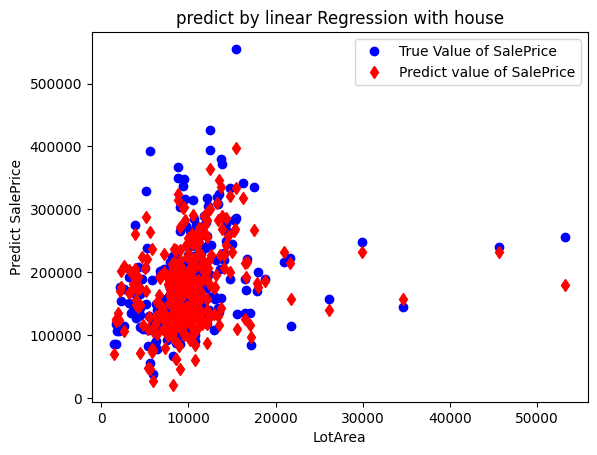

In [419]:
plt.plot(X_test['LotArea'], y_test, 'ob',label='True Value of SalePrice')
plt.plot(X_test['LotArea'],y_pred_lnr,'dr',label='Predict value of SalePrice')
plt.xlabel("LotArea")
plt.ylabel("Predict SalePrice")
plt.title('predict by linear Regression with house')
plt.legend();

### CART

Import

In [99]:
from sklearn.tree import DecisionTreeRegressor

Define, Train & Test

In [420]:
reg = DecisionTreeRegressor()
reg.fit(X_train, y_train)
y_pred_reg = reg.predict(X_test)

ลองทำนายเหมือนเทียบกับค่า LotArea และทำการ plot กราฟเพื่อแสดงค่าระหว่างค่าจริงและทำนาย

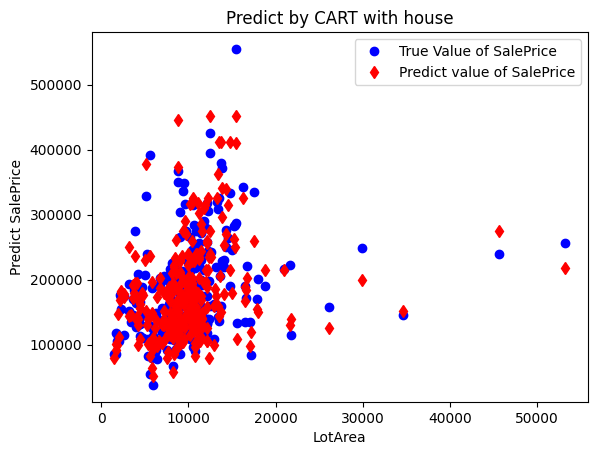

In [467]:
plt.plot(X_test['LotArea'], y_test, 'ob',label='True Value of SalePrice')
plt.plot(X_test['LotArea'],y_pred_reg,'dr',label='Predict value of SalePrice')
plt.xlabel("LotArea")
plt.ylabel("Predict SalePrice")
plt.title('Predict by CART with house')
plt.legend();

### KNN Regression with K=3

Import

In [325]:
from sklearn.neighbors import KNeighborsRegressor

Define, Train & Test

In [458]:
knn_model = KNeighborsRegressor(n_neighbors=3)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

ลองทำนายเหมือนเทียบกับค่า LotArea และทำการ plot กราฟเพื่อแสดงค่าระหว่างค่าจริงและทำนาย

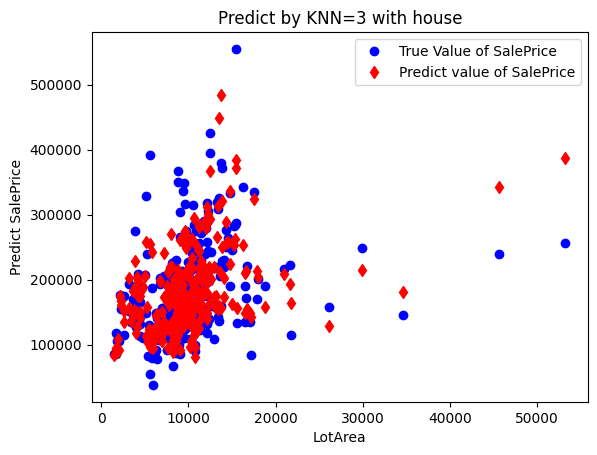

In [466]:
plt.plot(X_test['LotArea'], y_test, 'ob',label='True Value of SalePrice')
plt.plot(X_test['LotArea'],y_pred_knn,'dr',label='Predict value of SalePrice')
plt.xlabel("LotArea")
plt.ylabel("Predict SalePrice")
plt.title('Predict by KNN=3 with house')
plt.legend();

### KNN Regression with K=5

Define, Train & Test

In [460]:
knn5_model = KNeighborsRegressor(n_neighbors=5)
knn5_model.fit(X_train, y_train)
y_pred_knn5 = knn5_model.predict(X_test)

ลองทำนายเหมือนเทียบกับค่า LotArea และทำการ plot กราฟเพื่อแสดงค่าระหว่างค่าจริงและทำนาย

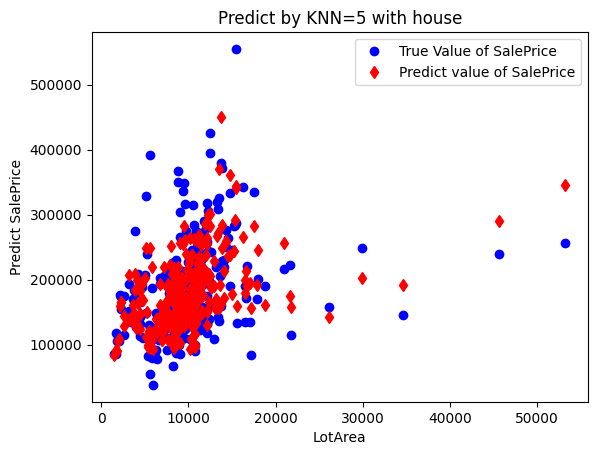

In [465]:
plt.plot(X_test['LotArea'], y_test, 'ob',label='True Value of SalePrice')
plt.plot(X_test['LotArea'],y_pred_knn5,'dr',label='Predict value of SalePrice')
plt.xlabel("LotArea")
plt.ylabel("Predict SalePrice")
plt.title('Predict by KNN=5 with house')
plt.legend();

## Statistic measurement for evaluation metrics

สำหรับการทดสอบในครั้งนี้เพื่อวัดว่าประสิทธิภาพตัวใดดีที่สุดจึงใช้วิธีการหาค่า MSE และ MAPE ทั้งนี้เกณฑ์ในการตัดสินใจเราจะเลือกค่าที่น้อยที่สุดมาเป็น Model เนื่องจาก เป็นค่า Error ยิ่งค่าน้อยยิ่งที่มีประสิทธิภาพที่ดี

Import คำสั่ง สำหรับการค่า MSE

In [279]:
from sklearn.metrics import mean_squared_error

In [442]:
# Function สำหรับการหาค่า MSE และ MAPE ด้วยการใส่ข้อมูล ค่าจริงและค่าทำนายสำหรับเปรียบเทียบ
def mse(true_values, predicted_values):
    return mean_squared_error(true_values,predicted_values)
def mape(true_values, predicted_values):
    return np.mean(np.abs((true_values - predicted_values) / true_values)) * 100

### MSE

In [462]:
mse_ln = mse(y_test, y_pred_lnr)
print(f"Mean Square Error (MSE) ของ Model Linear Regression: {mse_ln}")
mse_cart = mse(y_test, y_pred_reg)
print(f"Mean Square Error (MSE) ของ Model CART: {mse_cart}")
mse_knn = mse(y_test, y_pred_knn)
print(f"Mean Square Error (MSE) ของ Model KNN เมื่อ n=3: {mse_knn}")
mse_knn5 = mse(y_test, y_pred_knn5)
print(f"Mean Square Error (MSE) ของ Model KNN เมื่อ n=5: {mse_knn5}")

Mean Square Error (MSE) ของ Model Linear Regression: 742861003.9057626
Mean Square Error (MSE) ของ Model CART: 1327962300.55137
Mean Square Error (MSE) ของ Model KNN เมื่อ n=3: 1714976602.160959
Mean Square Error (MSE) ของ Model KNN เมื่อ n=5: 1662095945.7780821


MAPE

In [463]:
mape_ln = mape(y_test,y_pred_lnr)
print(f"Mean Average Percentage Error (MAPE) ของ Model Linear Regression: {mape_ln:.2f}%")
mape_cart = mape(y_test,y_pred_reg)
print(f"Mean Average Percentage Error (MAPE) ของ Model CART: {mape_cart:.2f}%")
mape_knn = mape(y_test,y_pred_knn)
print(f"Mean Average Percentage Error (MAPE) ของ Model KNN เมื่อ n=3: {mape_knn:.2f}%")
mape_knn5 = mape(y_test,y_pred_knn5)
print(f"Mean Average Percentage Error (MAPE) ของ Model KNN เมื่อ n=5: {mape_knn5:.2f}%")

Mean Average Percentage Error (MAPE) ของ Model Linear Regression: 12.13%
Mean Average Percentage Error (MAPE) ของ Model CART: 14.25%
Mean Average Percentage Error (MAPE) ของ Model KNN เมื่อ n=3: 16.58%
Mean Average Percentage Error (MAPE) ของ Model KNN เมื่อ n=5: 16.52%


จากข้อมูลพบว่า
 - Model ที่มีค่า MSE ที่ต่ำที่สุดคือ Linear Regression ด้วยค่า 742861003.9057626
 - Model ที่มีค่า MAPE ที่ต่ำที่สุดคือ Linear Regression ด้วยค่า 12.13%

ทั้งนี้เราสามารถอธิบายได้ว่าโมเดลที่ดีทีสุดในการทำนาย SalePrice คือ Linear Regression เนื่องจากค่า MSE และ MAPE น้อยที่สุด

จากข้อมูลประกอบไปด้วย
- LotArea
- OverallQual
- OverallCond
- BsmtFinSF1
- BsmtUnfSF
- TotalBsmtSF
- 1stFlrSF
- 2ndFlrSF
- GrLivArea
- GarageCars
- GarageArea